In [3]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

In [4]:
#we create two datasets: one consists of blobs of points, and the second consists of concentric circles
blob = lambda x, y, stddev, n_samples: list(zip(
    np.random.normal(x, stddev, n_samples),
    np.random.normal(y, stddev, n_samples)
))

circle = lambda x, y, stddev, radius, n_samples: [
    (
        x + radius * math.cos(2 * math.pi * i / n_samples) + np.random.normal(0, stddev),
        y + radius * math.sin(2 * math.pi * i / n_samples) + np.random.normal(0, stddev)
    )
    for i in range(n_samples)
]

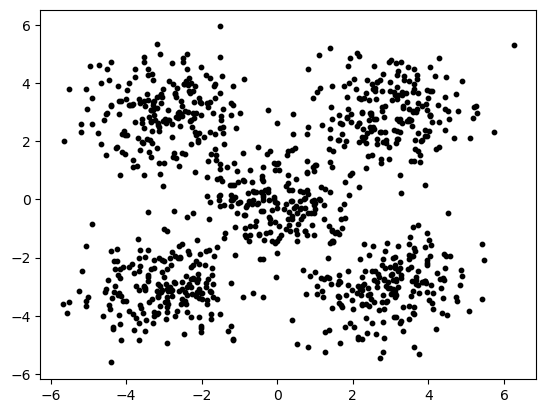

In [11]:
#plot the blobs dataset to see what it looks like
blobs_dataset = sum((blob(x, y, 1, 200) for x, y in [(0, 0), (3, 3), (-3, 3), (-3, -3), (3, -3)]), start=[])
plt.scatter(*zip(*blobs_dataset), s=10, color='black')
plt.show()

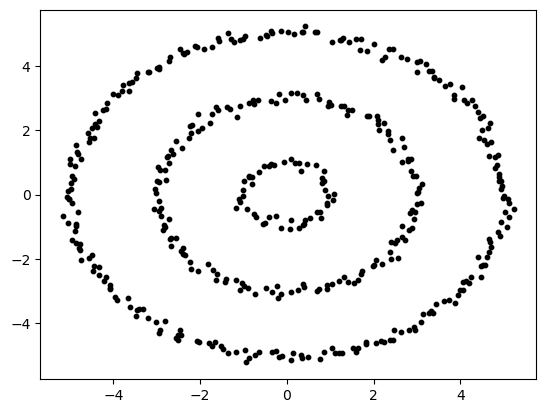

In [12]:
#plot the circles dataset to see what it looks like
circles_dataset = sum((circle(0, 0, 0.1, radius, radius * 50) for radius in [1, 3, 5]), start=[])
plt.scatter(*zip(*circles_dataset), s=10, color='black')
plt.show()

In [13]:
def display_clusters(clusters):
    # get len(clusters) spaced out colors
    colors = plt.get_cmap('Accent')(np.linspace(0, 1, len(clusters)))
    for (cluster_center, cluster), color in zip(clusters.items(), colors):
        # plot the cluster center using a big marker
        plt.scatter(*cluster_center, s=1000, color=color, alpha=0.2)
        # plot the cluster points using small markers
        plt.scatter(*zip(*cluster), s=10, color=color)
    plt.show()

def compute_clusters(X, cluster_centers):
    '''
    Given fixed cluster centers, computes the clusters of each cluster center c
    with respect to X, i.e. the set of points whose nearest cluster center is c.
    
    Returns:
        clusters (dict): the clusters as sets of points (tuples of floats),
            keyed by their cluster center
    '''
    X = np.array(X)
    cluster_centers = np.array(cluster_centers)
    diff=X-np.repeat(cluster_centers[:,np.newaxis,:], len(X), axis=1)
    norms=np.linalg.norm(diff, axis=2)
    closest_cc=cluster_centers[np.argmin(norms, axis=0)]
    clusters=defaultdict(set)
    for x, cc in zip(X, closest_cc):
        clusters[tuple(cc)].add(tuple(x))
    return clusters
    # TODO: Implement this, and use the following two cells to ensure it works.
    #     We will probably do this together because numpy is hard.

In [14]:
#now we make the kmeans class
class KMeans:
    def __init__(self, X, K, max_iter=300):
        self.X = np.array(X)
        self.K = K
        self.max_iter = max_iter
        self.converged = False
        self.cluster_centers = self._initialize_centers()
        self.clusters = defaultdict(set)
        self._fit()

    #choose K points uniformly randomly to be the initial cluster centers
    def _initialize_centers(self):
        return self.X[np.random.choice(len(self.X), self.K, replace=False)]

    #iteratively assign nearest points to the cluster of each center, then update center to be mean of cluster (by Euclidean distance)
    def _fit(self):
        iteration = 0
        while not self.converged and iteration < self.max_iter:
            iteration += 1
            old_clusters = dict(self.clusters)
            self.clusters = compute_clusters(self.X, self.cluster_centers)
            
            new_centers = []
            for cluster in self.clusters.values():
                #check that cluster is nonempty
                if cluster:
                    #to calculate mean, need to convert set of points in cluster to list, then to numpy arry
                    new_center = np.mean(np.array(list(cluster)), axis=0)
                    new_centers.append(new_center)
            #make sure there are nonempty clusters
            if new_centers:
                new_centers = np.array(new_centers)
                if np.array_equal(new_centers, self.cluster_centers):
                    self.converged = True
                else:
                    self.cluster_centers = new_centers
            #if no nonempty clusters, break the loop
            else:
                break
            

kmeans_blobs.converged=True


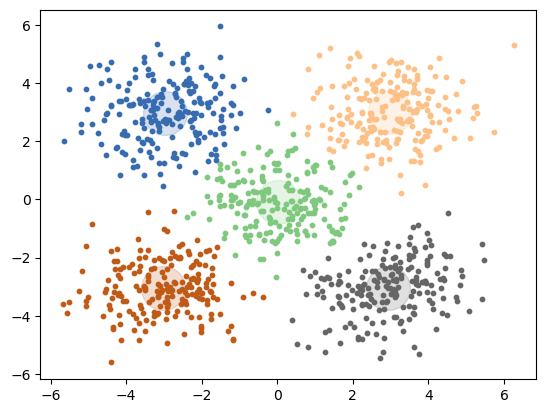

In [15]:
#now test the kmeans class on the blobs dataset; it performs well because based on Euclidean distance
kmeans_blobs = KMeans(blobs_dataset, 5)
print(f'{kmeans_blobs.converged=}')
display_clusters(kmeans_blobs.clusters)

kmeans_circles.converged=True


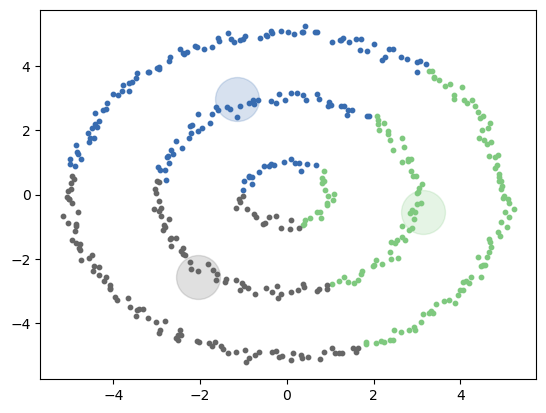

In [16]:
#when we test on circles dataset, it doesn't do what we want; it can't segment the points into the circles
#we need to use spectral clustering to get the desired performance on this dataset
kmeans_circles = KMeans(circles_dataset, 3)
print(f'{kmeans_circles.converged=}')
display_clusters(kmeans_circles.clusters)